### Data Cleaning
Performed in original excel data file
- Cleaned data with 4 and 6 letters. rprobe -> probe, tash -> trash, clen -> clean
- Removed extra spaces.
- Adjusted Mar 27th 2022 data. Sum before adjustment was 126%. After adjustment, it is 100%.


In [1]:
# read initial xlsx
import os
import pandas as pd
if (os.path.exists("Problem_C_Data_Wordle_with_freq.xlsx")):
    xls = pd.ExcelFile('Problem_C_Data_Wordle_with_freq.xlsx')
    df = xls.parse('Sheet1')
    print(df.head())
    print("File loaded")
    print(df.columns)
else:
    xls = pd.ExcelFile('Problem_C_Data_Wordle.xlsx')
    df = xls.parse('Sheet1')
    words = df["Word"]
    words = words.str.lower()

    word_frequency = [word_frequency(word, 'en') for word in words]

    df["Word Frequency"] = word_frequency

    df.to_excel("Problem_C_Data_Wordle_with_freq.xlsx", index=False)

    print("Sheet with freq created")
    print(df.head())
    print("File loaded")

# print(df.head())

        Date  Contest number   Word  Number of  reported results  \
0 2022-12-31             560  manly                        20380   
1 2022-12-30             559  molar                        21204   
2 2022-12-29             558  havoc                        20001   
3 2022-12-28             557  impel                        20160   
4 2022-12-27             556  condo                        20879   

   Number in hard mode  1 try  2 tries  3 tries  4 tries  5 tries  6 tries  \
0                 1899      0        2       17       37       29       12   
1                 1973      0        4       21       38       26        9   
2                 1919      0        2       16       38       30       12   
3                 1937      0        3       21       40       25        9   
4                 2012      0        2       17       35       29       14   

   7 or more tries (X)  Word Frequency  
0                    2    4.570000e-06  
1                    1    9.770000e-07  

/var/folders/9x/5z4ktp1n3zl3cbqyzlvr394r0000gn/T/ipykernel_50820/2309718467.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0202020202020203' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  try_2[i] = try_2[i] * scale
/var/folders/9x/5z4ktp1n3zl3cbqyzlvr394r0000gn/T/ipykernel_50820/2309718467.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17.171717171717173' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  try_3[i] = try_3[i] * scale
/var/folders/9x/5z4ktp1n3zl3cbqyzlvr394r0000gn/T/ipykernel_50820/2309718467.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '37.37373737373738' has dtype incompatible with int64, please explicitly cast to a compatib

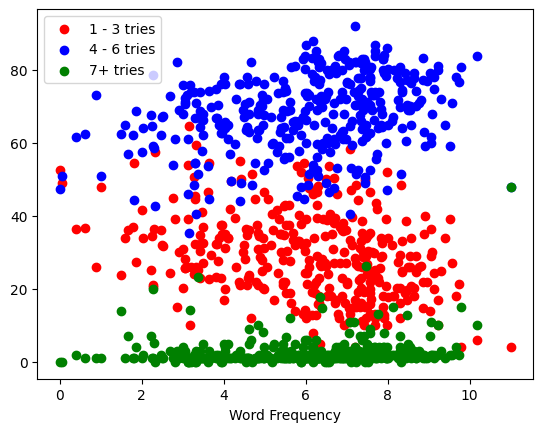

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df = df.sort_values(by="Word Frequency")

word_freq = df["Word Frequency"]

# normalize word frequency min-max
word_freq = (word_freq - word_freq.min()) / (word_freq.max() - word_freq.min())

# normalize word frequency z-score
# word_freq = (word_freq - word_freq.mean()) / word_freq.std()

word_freq = -np.log(word_freq) # log scale and ensure positive

try_1 = df["1 try"].copy()
try_2 = df["2 tries"].copy()
try_3 = df["3 tries"].copy()
try_4 = df["4 tries"].copy()
try_5 = df["5 tries"].copy()
try_6 = df["6 tries"].copy()
try_7 = df["7 or more tries (X)"].copy()

for i in range(len(try_7)):
    sum = try_1[i] + try_2[i] + try_3[i] + try_4[i] + try_5[i] + try_6[i] + try_7[i]
    scale = 100 / sum
    try_1[i] = try_1[i] * scale
    try_2[i] = try_2[i] * scale
    try_3[i] = try_3[i] * scale
    try_4[i] = try_4[i] * scale
    try_5[i] = try_5[i] * scale
    try_6[i] = try_6[i] * scale
    try_7[i] = try_7[i] * scale

try_less_than_4 = try_1 + try_2 + try_3
try_greater_than_4 = try_4 + try_5 + try_6

plt.scatter(word_freq, try_less_than_4, color='red', label='1 - 3 tries')
plt.scatter(word_freq, try_greater_than_4, color='blue', label='4 - 6 tries')
plt.scatter(word_freq, try_7, color='green', label='7+ tries')

plt.xlabel('Word Frequency')
plt.legend()


In [ ]:
import numpy as np
from scipy.optimize import least_squares
from scipy.integrate import odeint

# Sample data (replace these with your actual data)
x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([2, 3, 4, 5, 6])
dotx_data = np.array([0.5, 1.0, 1.5, 2.0, 2.5])
doty_data = np.array([-0.5, -1.0, -1.5, -2.0, -2.5])

def derivative(X0, t, params):
    x, y, z = X0
    a, b, c, d, e, f, g, h, i = params

    dxdt = a * x + b * y + c * z
    dydt = d * x + e * y + f * z
    dzdt = g * x + h * y + i * z

    return dxdt, dydt, dzdt

# Model function
def model(params, x, y):
    a, b, k, lam = params
    dotx_model = x * (a - b * y)
    doty_model = y * (-k + lam * x)
    return dotx_model, doty_model

# Residual function for least squares
def residuals(params, x, y, dotx_obs, doty_obs):
    dotx_model, doty_model = model(params, x, y)
    res_dotx = dotx_model - dotx_obs
    res_doty = doty_model - doty_obs
    return np.concatenate([res_dotx, res_doty])

# Initial guess for parameters
initial_guess = [1.0, 1.0, 1.0, 1.0]

# Perform the least squares optimization
result = least_squares(residuals, initial_guess, args=(x_data, y_data, dotx_data, doty_data))

# Extract the fitted parameters
fitted_params = result.x
a, b, k, lam = fitted_params

print("Fitted parameters:")
print(f"a = {a:.3f}, b = {b:.3f}, k = {k:.3f}, λ = {lam:.3f}")


In [10]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import odeint

def derivative(X0, t, params):
    x, y, z = X0
    a, b, c, d, e, f, g, h, i = params

    dxdt = a * x + b * y + c * z
    dydt = d * x + e * y + f * z
    dzdt = g * x + h * y + i * z

    return dxdt, dydt, dzdt
    

def objective(x, y, z, t, params):
    X0 = (x, y, z)
    pred_x, pred_y, pred_z = odeint(derivative, X0, t, args = params).T

    return (pred_x - x) ** 2 + (pred_y - y) ** 2 + (pred_z - z) ** 2


def constraint(X0):
    x, y, z = X0
    return x + y + z - 100

initial_params = [1, 1, 1, 1, 1, 1, 1, 1, 1]
initial_guess = [50, 25, 25]

cons = {'type': 'eq', 'fun': constraint}

result = minimize(objective, initial_params, args=(try_less_than_4, try_greater_than_4, try_7, word_freq))



ValueError: The values in t must be monotonically increasing or monotonically decreasing; repeated values are allowed.